In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load dataset

train = pd.read_csv('Train_v2.csv')
test = pd.read_csv('Test_v2.csv')
sub = pd.read_csv('SubmissionFile.csv')

In [3]:
#shape of the dataset

print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (23524, 13)
test shape: (10086, 12)


In [4]:
# inspecting train data

train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# information on train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

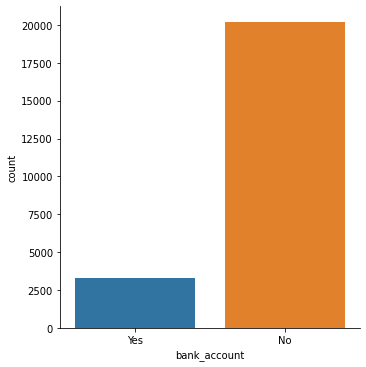

In [7]:
#explore target distribution

sns.catplot(x="bank_account",kind='count', data=train)

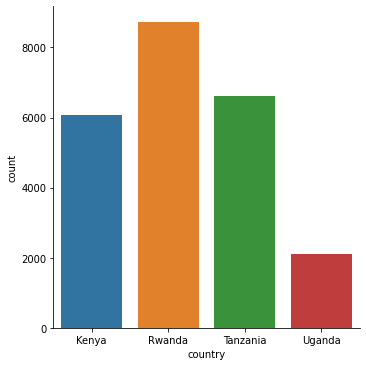

In [8]:
# explore country distribbution

sns.catplot(x='country',kind='count',data=train)

* This shows that alot of the data was collected in Rwanda and Tanzania

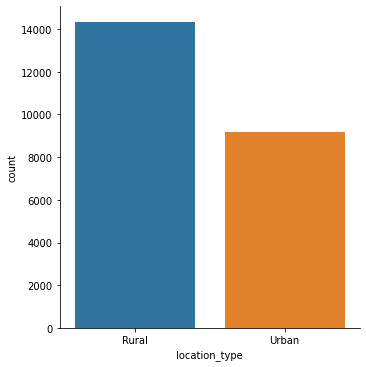

In [9]:
# exploring location type

sns.catplot(x='location_type',kind='count',data=train)

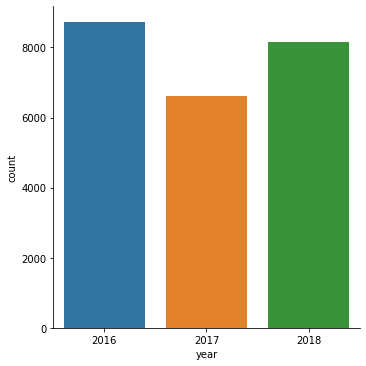

In [10]:
# Explore year distribution

sns.catplot(x='year',kind='count',data=train)

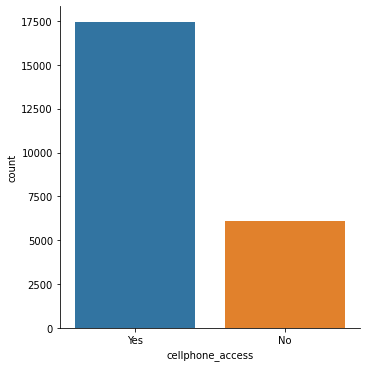

In [11]:
# Explore cellphone_access distribution

sns.catplot(x='cellphone_access',kind='count',data=train)

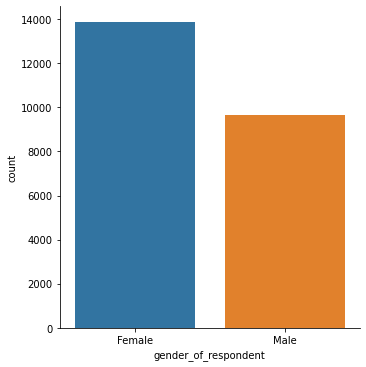

In [12]:
# Explore gender of respondent 

sns.catplot(x='gender_of_respondent',kind='count',data=train)

In [13]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [14]:
from sklearn.preprocessing import LabelEncoder

#convert target var to numeric data 
le = LabelEncoder()

train['bank_account'] = le.fit_transform(train['bank_account'])

* 1 is for YES

* 0 is for NO

In [15]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [16]:
# seperate target from predictors

X = train.drop(['bank_account'], axis=1)
y = train['bank_account']

In [17]:
#Handle conversion of data types
#Convert categorical features to numerical features by using One-hot Encoder and Label Encoder
#Drop uniqueid variable
#Perform feature scaling.


In [18]:
float_array = X[['year','household_size','age_of_respondent']].values.astype('float')

In [19]:
float_array

array([[2018.,    3.,   24.],
       [2018.,    5.,   70.],
       [2018.,    5.,   26.],
       ...,
       [2018.,    5.,   27.],
       [2018.,    7.,   30.],
       [2018.,   10.,   20.]])

In [20]:
#categorical features to be one-hot-encoded

#relationship_with_head, marital_status,job_type, education_level, country

categ = ['relationship_with_head','marital_status','country','education_level','job_type']

X = pd.get_dummies(X, columns=categ)
X.head()

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,uniqueid_1,Rural,Yes,3,24,Female,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,uniqueid_2,Rural,No,5,70,Female,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,uniqueid_3,Urban,Yes,5,26,Male,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,uniqueid_4,Rural,Yes,5,34,Female,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,uniqueid_5,Urban,No,8,26,Male,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
X['location_type'] = le.fit_transform(X['location_type'])
X['gender_of_respondent'] = le.fit_transform(X['gender_of_respondent'])
X['cellphone_access'] = le.fit_transform(X['cellphone_access'])

X.drop(['uniqueid'],axis=1, inplace=True)

In [22]:
X.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,0,1,3,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,5,70,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,1,1,5,26,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2018,0,1,5,34,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,8,26,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
X[['year','household_size','age_of_respondent']] = X[['year','household_size','age_of_respondent']].values.astype('float')

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             23524 non-null  float64
 1   location_type                                    23524 non-null  int64  
 2   cellphone_access                                 23524 non-null  int64  
 3   household_size                                   23524 non-null  float64
 4   age_of_respondent                                23524 non-null  float64
 5   gender_of_respondent                             23524 non-null  int64  
 6   relationship_with_head_Child                     23524 non-null  uint8  
 7   relationship_with_head_Head of Household         23524 non-null  uint8  
 8   relationship_with_head_Other non-relatives       23524 non-null  uint8  
 9   relationship_with_head_Other

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

X

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [26]:
X[:1]

array([[1.       , 0.       , 1.       , 0.1      , 0.0952381, 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 1.       ,
        0.       , 0.       , 1.       , 0.       , 0.       , 1.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        1.       ]])

In [27]:
X.shape

(23524, 37)

In [28]:
# split into trainig and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size =0.1, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


lr = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
xgb = XGBClassifier
extc = ExtraTreesClassifier()

In [30]:
# fitting the models

#lr.fit(X_train,y_train)
rfc.fit(X_train, y_train)
knc.fit(X_train, y_train)
#xgb.fit(X_train, y_train)
extc.fit(X_train, y_train)

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# predicting 

#lr_pred = lr.predict(X_test)
rfc_pred = rfc.predict(X_test)
knc_pred = knc.predict(X_test)
#xgb_pred = xgb.predict(X_test)
extc_pred = extc.predict(X_test)

# checking accuracy
#print(f'Error rate of Logistic Regression: 1 - {accuracy_score(y_test,lr_pred)}')
print(f'Error rate of Random Forest Classifier:   {1 - accuracy_score(y_test,rfc_pred)}')
print(f'Error rate of KNeighbors Classifier:  {1 - accuracy_score(y_test,knc_pred)}')
#print(f'Error rate of Xggboost Classifier: {accuracy_score(y_test,xgb_pred)}')
print(f'Error rate of Extra Tree Classifier: {1 - accuracy_score(y_test,extc_pred)}')

Error rate of Random Forest Classifier:   0.13514662133446664
Error rate of KNeighbors Classifier:  0.12027199320017001
Error rate of Extra Tree Classifier: 0.14747131321716955


* Kneighbors classifier has the lowest error rate

In [31]:
#Preprocessing test data

test[['year','household_size','age_of_respondent']] = test[['year','household_size','age_of_respondent']].values.astype('float')

categ = ['relationship_with_head','marital_status','country','education_level','job_type']

test = pd.get_dummies(test, columns=categ)


test['location_type'] = le.fit_transform(test['location_type'])
test['gender_of_respondent'] = le.fit_transform(test['gender_of_respondent'])
test['cellphone_access'] = le.fit_transform(test['cellphone_access'])

test.head()

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018.0,uniqueid_6056,1,1,3.0,30.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2018.0,uniqueid_6060,1,1,7.0,51.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2018.0,uniqueid_6065,0,0,3.0,77.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018.0,uniqueid_6072,0,0,6.0,39.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2018.0,uniqueid_6073,1,0,3.0,16.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
scaled_test = scaler.fit_transform(test.drop('uniqueid',axis=1))

scaled_test

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.]])

In [33]:
sub['bank_account'] = knc.predict(scaled_test)

submission = sub.copy()
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1
1,uniqueid_6722 x Kenya,1
2,uniqueid_6714 x Kenya,0
3,uniqueid_8103 x Kenya,0
4,uniqueid_8657 x Kenya,0


In [34]:
submission.shape

(10086, 2)

In [35]:
submission.to_csv('Financial_Inclusion_Submission.csv',index=False)